# <p style="text-align:center"> <font color='darkorange'>**CUNEF**</font>
## <p style="text-align:center"> **Practice III - Retail score analysis**
#### <p style="text-align:center"> **Machine Learning**</strong><br />
    
<p style="text-align:left">Pablo Mazariegos Reviriego - <font color='orange'>pablo.mazariegos@cunef.edu </font>
    
<p style="text-align:left">Mario Sabater Pascual - <font color='orange'>mario.sabater@cunef.edu </font>

![Highway](https://www.restaurant-hospitality.com/sites/restaurant-hospitality.com/files/styles/article_featured_retina/public/uploads/2013/07/yelplogopromo.jpg?itok=OM0azJTj)

In this Machine Learning practice we will be working with the **Yelp dataset**. The whole practice will be composed by the following notebooks:

 0. Data Reading and Problem statement
 1. Data selection & variables preparation
 2. EDA
 3. Model selection
 4. Best Model and Explainability
 5. <font color='darkgreen'>**Variables Relationship (Graphs)**</font>

**Creating Graphs**

Graphs are networks consisting of nodes connected by edges or arcs. In directed graphs, the connections between nodes have a direction, and are called arcs; in undirected graphs, the connections have no direction and are called edges 

 - [Libraries import and dataset load](#0)
 - [Variables Relationship (Graphs)](#1)

##  <a name="0"> **Libraries import and dataset load**</a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

**Data Read**

In [2]:
pd.set_option('display.max_columns', 500)
restaurants = pd.read_csv('../data/processed/restaurants_models.csv')
restaurants.head(3)

stars  review_count  is_open  restaurants  food  bars  sandwiches  \
0    1.0      0.009917      1.0          1.0   1.0   0.0         0.0   
1    1.0      0.001058      1.0          0.0   1.0   0.0         0.0   
2    0.0      0.000132      1.0          1.0   1.0   0.0         1.0   

   american (traditional)  pizza  coffee & tea  breakfast & brunch  \
0                     0.0    0.0           1.0                 0.0   
1                     0.0    0.0           0.0                 0.0   
2                     0.0    0.0           0.0                 0.0   

   american (new)  fast food  burgers  mexican  italian  specialty food  \
0             0.0        0.0      0.0      0.0      0.0             0.0   
1             0.0        0.0      0.0      0.0      0.0             0.0   
2             0.0        1.0      1.0      0.0      0.0             0.0   

   seafood  desserts  bakeries  salad  chinese  cafes  chicken wings  \
0      0.0       0.0       1.0    0.0      0.0    0.0            0.0   
1      0.0       0.0       0.0    0.0      0.0    0.0            0.0   
2      0.0       0.0       0.0    0.0      0.0    0.0            0.0   

   ice cream & frozen yogurt  beer  sports bars  cocktail bars  \
0                        0.0   0.0          0.0            0.0   
1                        0.0   0.0          0.0            0.0   
2                        1.0   0.0          0.0            0.0   

   juice bars & smoothies  barbeque  japanese  pubs  sushi bars  local flavor  \
0                     0.0       0.0       0.0   0.0         0.0           0.0   
1                     0.0       0.0       0.0   0.0         0.0           0.0   
2                     0.0       0.0       0.0   0.0         0.0           0.0   

   asian fusion  diners  steakhouses  mediterranean  wine bars  southern  \
0           0.0     0.0          0.0            0.0        0.0       0.0   
1           0.0     0.0          0.0            0.0        0.0       0.0   
2           0.0     0.0          0.0            0.0        0.0       0.0   

   cajun/creole  donuts  tacos  soup  thai  beer bar  tex-mex  greek  \
0           0.0     0.0    0.0   0.0   0.0       0.0      0.0    0.0   
1           0.0     0.0    0.0   0.0   0.0       0.0      0.0    0.0   
2           0.0     0.0    0.0   0.0   0.0       0.0      0.0    0.0   

   breweries  vietnamese  chicken shop  hot dogs  indian  bagels  \
0        0.0         0.0           0.0       0.0     0.0     0.0   
1        1.0         0.0           0.0       0.0     0.0     0.0   
2        0.0         0.0           0.0       0.0     0.0     0.0   

   comfort food  cheesesteaks  ethnic food  caribbean  middle eastern  french  \
0           0.0           0.0          0.0        0.0             0.0     0.0   
1           0.0           0.0          0.0        0.0             0.0     0.0   
2           0.0           0.0          0.0        0.0             0.0     0.0   

   soul food  buffets  gastropubs  fruits & veggies  korean  bubble tea  \
0        0.0      0.0         0.0               0.0     0.0         1.0   
1        0.0      0.0         0.0               0.0     0.0         0.0   
2        0.0      0.0         0.0               0.0     0.0         0.0   

   tapas/small plates  food stands  cupcakes  noodles  wineries  cuban  \
0                 0.0          0.0       0.0      0.0       0.0    0.0   
1                 0.0          0.0       0.0      0.0       0.0    0.0   
2                 0.0          0.0       0.0      0.0       0.0    0.0   

   spanish  acai bowls  RestaurantsPriceRange2  WiFi  Alcohol  Smoking  \
0      0.0         0.0                0.000000   1.0      0.0      0.0   
1      0.0         0.0                0.333333   0.0      0.0      0.0   
2      0.0         0.0                0.000000   0.0      0.0      0.0   

   BYOBCorkage  AgesAllowed  num_days_open  num_hours_open  average_income  \
0          0.0          0.0       1.000000        0.559524        0.180427   
1         

## **GRAPHS**

A graph is a pictorial representation of a set of objects where some pairs of objects are connected by links. The interconnected objects are represented by points termed as vertices, and the links that connect the vertices are called edges. The various terms and functionalities associated with a graph is described in great detail in our tutorial here.

In this chapter we are going to see how to create a graph and add various data elements to it using a python program. Following are the basic operations we perform on graphs.

    -Display graph vertices
    -Display graph edges
    -Add a vertex
    -Add an edge
    -Creating a graph
    
A graph can be easily presented using the python dictionary data types. We represent the vertices as the keys of the dictionary and the connection between the vertices also called edges as the values in the dictionary.

**What are graph algorithms used for?**

Graph algorithms are used to solve the problems of representing graphs as networks like airline flights, how the Internet is connected, or social network connectivity on Facebook. They are also popular in NLP and machine learning to form networks

##  <a name="1"> **Variables Relationship (Graphs)** </a>

Given the number of variables provided to our models, we will now graph and study the relationships between them thorugh _Graphs Theory_.

Despite the number of variables there are three main groups. Those comming from categories (type of food), attributes and states.

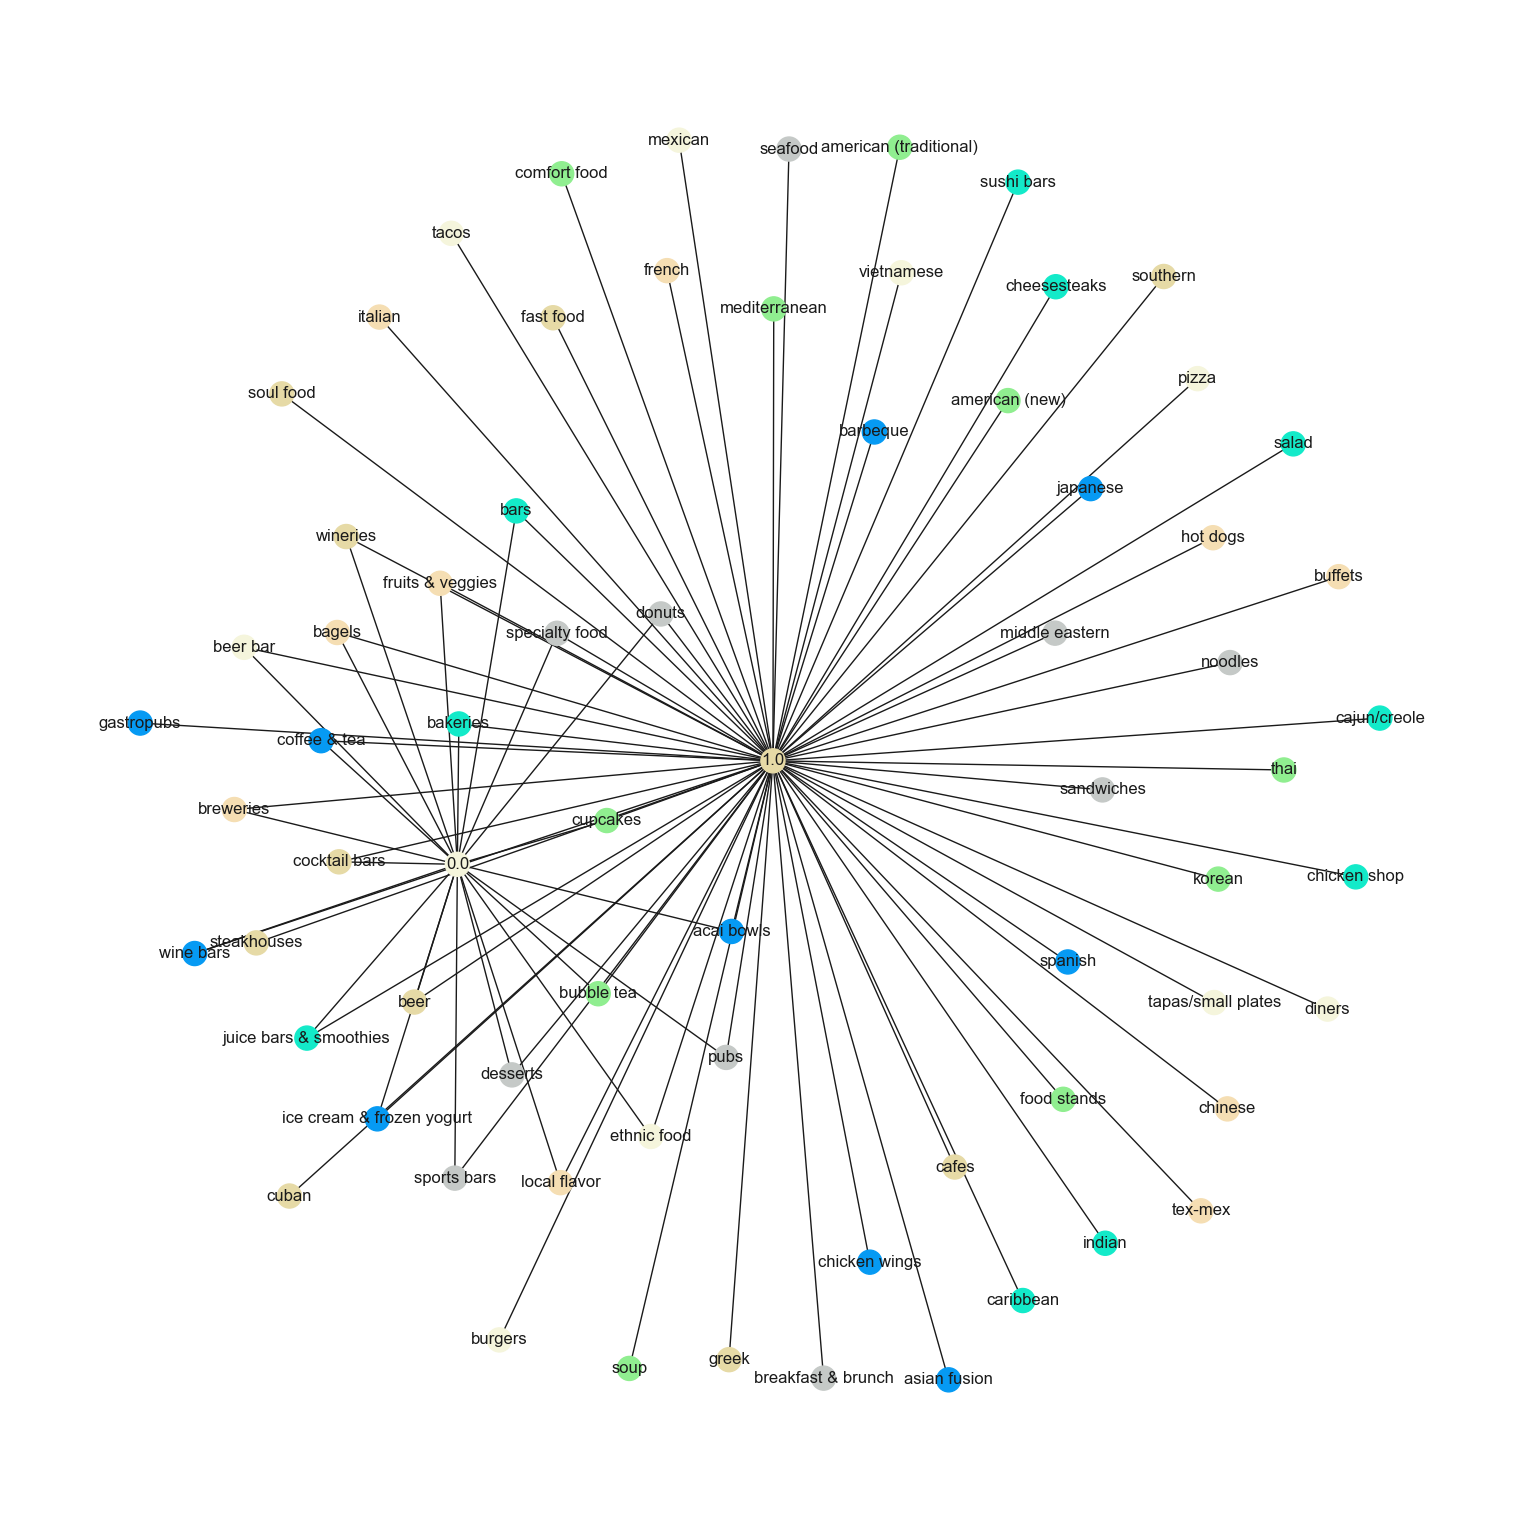

The Graph has 71 nodes and 92 edges


In [36]:
plt.figure(figsize=(15, 15))
# Creates the empty graph
G = nx.Graph()

# Add the vertices to the graph
for i, row in restaurants.iterrows():
    G.add_node(row['restaurants'])

# Add edges to the graph
for i, row in restaurants.iterrows():
    for category in row.index[5:-44]:
        if row[category] == 1:
            G.add_edge(row['restaurants'], category)

# Assign each vertex a different color
colors = ['#E6DAA6', '#F5F5DC', '#069AF3', '#13EAC9', '#90EE90', '#F5DEB3', '#C5C9C7']
node_colors = {v: colors[i % len(colors)] for i, v in enumerate(G.nodes())}

# Draw the graph with the colors assigned to each vertex.
pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos, with_labels=True, node_color=list(map(node_colors.get, G.nodes())))

# Show the graph
plt.show()
print("The Graph has " + str(G.number_of_nodes()) + " nodes and " + str(G.number_of_edges()) + 
      " edges")


In the graph above we can observe the relationship between variables we had left obtained from the original column categories. We can observe two main groups, the first one is what we can called traditional restaurants with common node is the 1 for restaurants. The other group is businesses that might not be allocated as traditional restaurats as pubs, juice bars & smoothies or coffee & tea. This last group belongs for both nodes 1 and 0 for restautants.

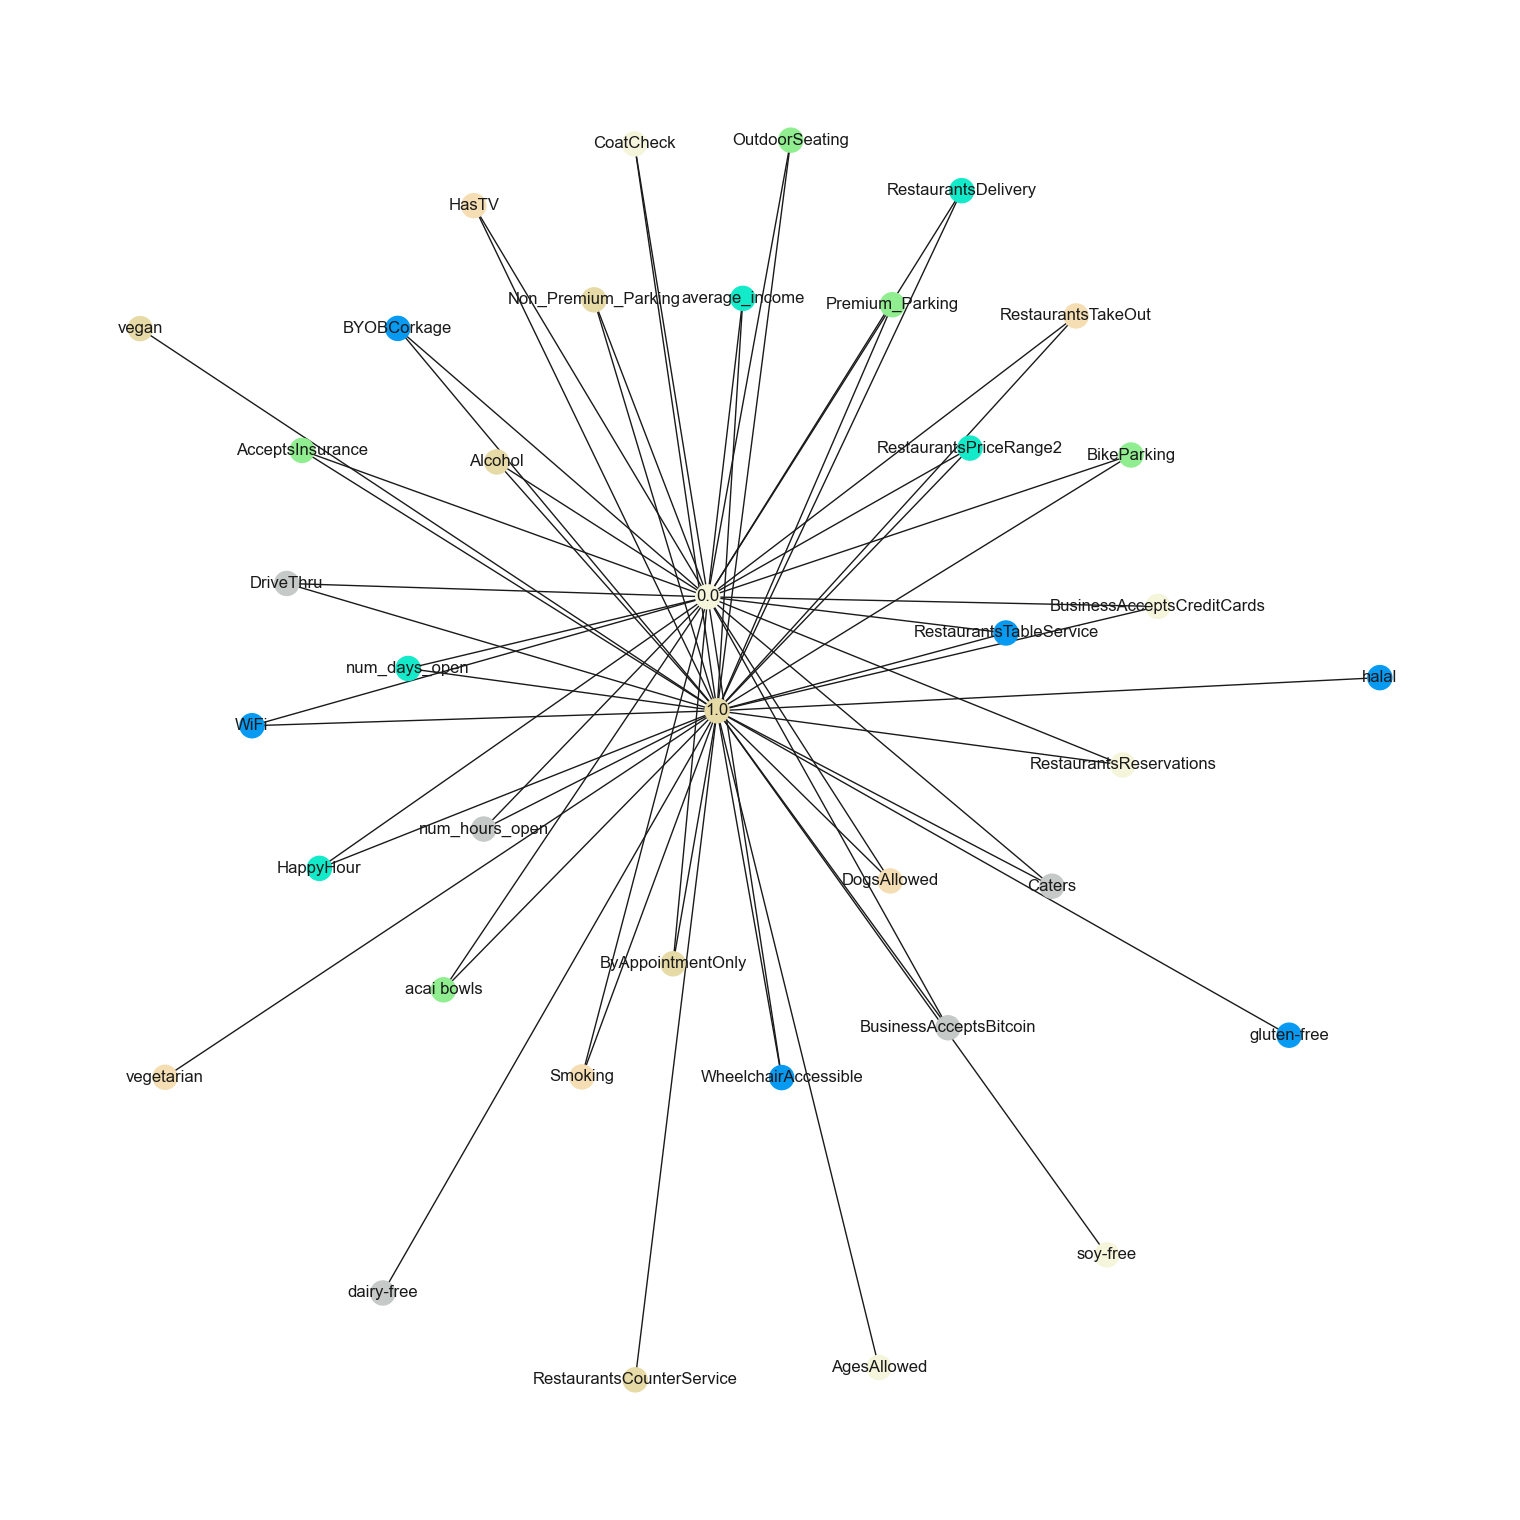

The Graph has 38 nodes and 64 edges


In [43]:
plt.figure(figsize=(15, 15))
# Creates the empty graph
G = nx.Graph()

# Add the vertices to the graph
for i, row in restaurants.iterrows():
    G.add_node(row['restaurants'])

# Add edges to the graph
for i, row in restaurants.iterrows():
    for category in row.index[-45:-8]:
        if row[category] == 1:
            G.add_edge(row['restaurants'], category)

# Assign each vertex a different color
colors = ['#E6DAA6', '#F5F5DC', '#069AF3', '#13EAC9', '#90EE90', '#F5DEB3', '#C5C9C7']
node_colors = {v: colors[i % len(colors)] for i, v in enumerate(G.nodes())}

# Draw the graph with the colors assigned to each vertex.
nx.draw(G, with_labels=True, node_color=list(map(node_colors.get, G.nodes())))

# Show the graph
plt.show()
print("The Graph has " + str(G.number_of_nodes()) + " nodes and " + str(G.number_of_edges()) + 
      " edges")



Similar to the previous graph, in this one we plotted the attributes. Due to the fact that these are more ambiguous in the sense that they are more difficult to separate them in groups, the Graph stoll differenciates them depeding on the retaurants value.

The Graph has 75 nodes and 536 edges


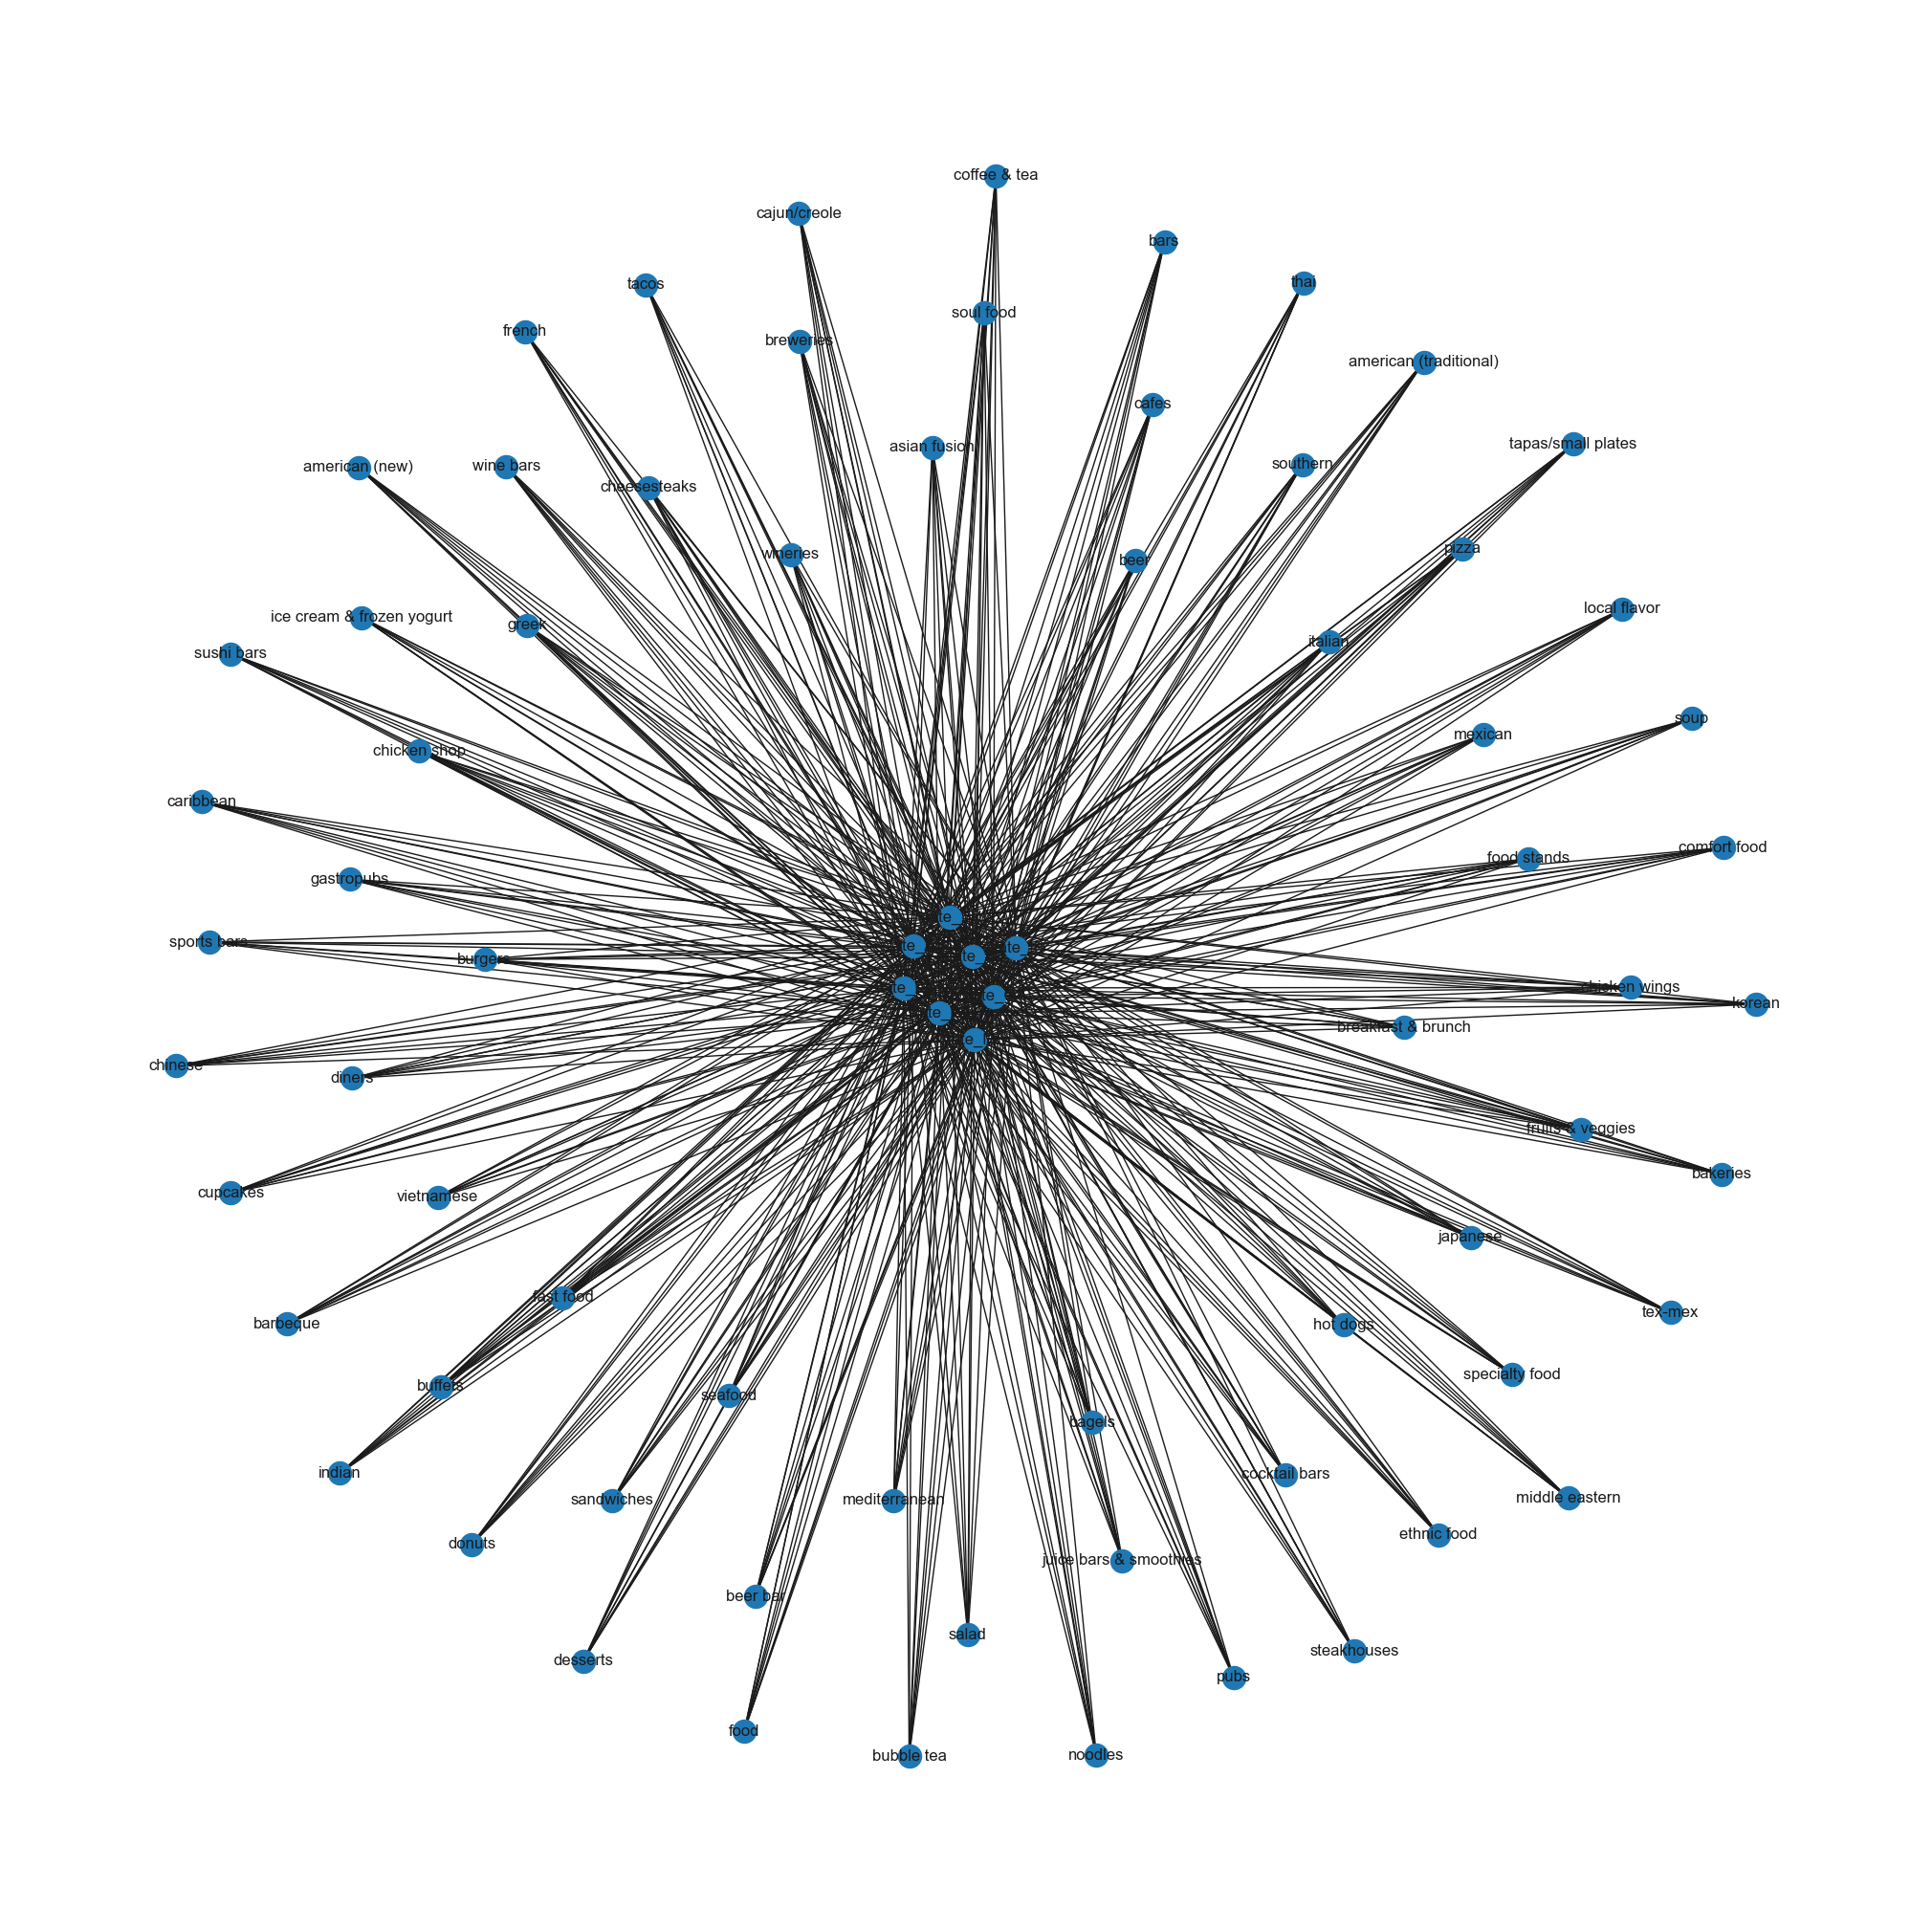

In [38]:
plt.figure(figsize=(20, 20))

# Creates the empty graph
G = nx.Graph()

# We obtain the names of the columns
columns = restaurants.columns

# We filter the status columns
state_columns = columns[-8:]

# We filter the columns by food type
food_columns = columns[4:71]

# Iterate over the rows of the dataframe
for i, row in restaurants.iterrows():
    # We create a node for each state
    for state in state_columns:
        if row[state]:
            G.add_node(state)
    
    # We create a node for each type of food.
    for food in food_columns:
        if row[food]:
            G.add_node(food)
    
    # We add a connection between the state and the corresponding type of food.
    for state in state_columns:
        if row[state]:
            for food in food_columns:
                if row[food]:
                    G.add_edge(state, food)

# We draw the graph
nx.draw(G, with_labels=True)
print("The Graph has " + str(G.number_of_nodes()) + " nodes and " + str(G.number_of_edges()) + 
      " edges")

One of the most interesting things in the dataset is to know what the relationships between states and restaurant categories are. But, since the number of states and categories is so high we end up with 75 nodes and 536 edged. The amount of data, does not let us visualize the relationships. We will make a selection of representative states and categories. 

The Graph has 20 nodes and 75 edges


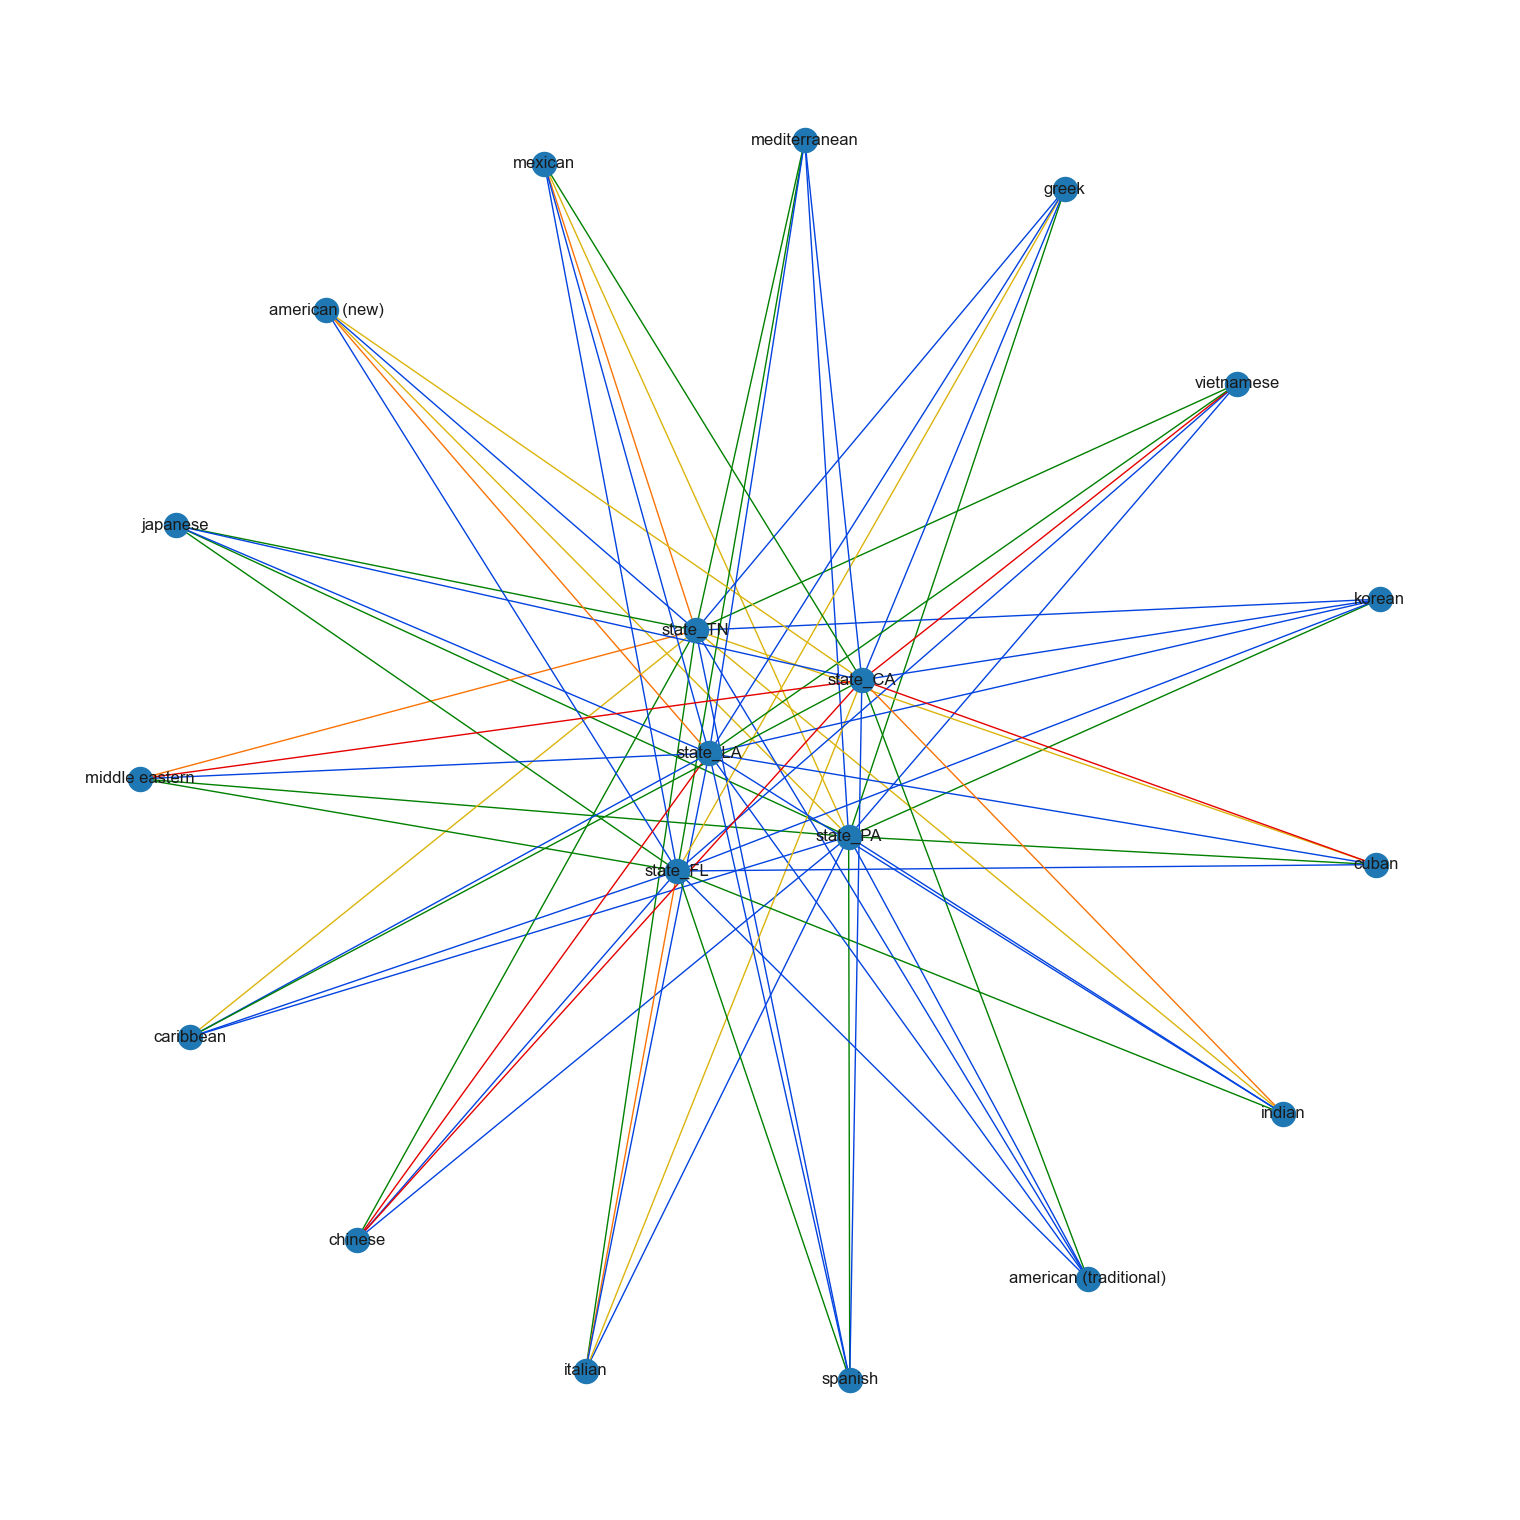

In [39]:
plt.figure(figsize=(15, 15))
# Creates the empty graph
G = nx.Graph()

# We obtain the names of the columns
columns = restaurants.columns

# Select the status columns
state_columns = columns[columns.isin(['state_CA', 'state_TN', 'state_PA', 'state_FL', 'state_LA'])]

# We select the food type columns
food_columns = columns[columns.isin(['american (traditional)', 'american (new)', 'mexican', 'italian', 
                                     'chinese', 'japanese', 'mediterranean', 'greek', 'vietnamese', 'indian', 
                                     'caribbean', 'middle eastern', 'French', 'korean', 'cuban', 'spanish'])]

# We create a list of colors for each edge.
edge_colors = []

# Iterate over the rows of the dataframe
for i, row in restaurants.iterrows():
    # We create a node for each state
    for state in state_columns:
        if row[state]:
            G.add_node(state)
    
    # We create a node for each type of food.
    for food in food_columns:
        if row[food]:
            G.add_node(food)
    
    # We add a connection between the state and the corresponding type of food.
    for state in state_columns:
        if row[state]:
            for food in food_columns:
                if row[food]:
                    G.add_edge(state, food)
                    # We change the color of the edge depending on the state
                    if state == 'state_CA':
                        edge_colors.append('#E50000') #red                    
                    elif state == 'state_TN':
                        edge_colors.append('#DBB40C') #gold
                    elif state == 'state_PA':
                        edge_colors.append('#0343DF') #blue
                    elif state == 'state_FL':
                        edge_colors.append('#008000') #green
                    elif state == 'state_LA':
                        edge_colors.append('#F97306') #orange                      

# We draw the graph
nx.draw(G, with_labels=True, edge_color=edge_colors)
print("The Graph has " + str(G.number_of_nodes()) + " nodes and " + str(G.number_of_edges()) + 
      " edges")

By only selecting 5 representative states and some categories (focusing on type of cusine) we can take a better look to the relationships between cusines and states. At first glance we might look at more blue edges representing the Pennsilvania state. Recalling from the notebook "0.Data Reading and Problem statement" this state had the most amount of business, what can lead to more variety, and more relationships. 

We can observe that with some exceptions, every state includes esvery typ of cusine. The exceptions are the spanish, american (traditional), korean, mediterranean and japanese with only had relations with the aforementioned Pennsilvania and Florida, another high count of business state. 

One thing that seems surprising is the no relationship between mexican food and california, as the state is heavely influenced by this culture and considered one of the most multicultural.